# 基于实例选择性注意力机制的神经关系提取
杨凯林1，沈世琦1，刘志远1,2，黄波銮1，毛松1,2 
1计算机科学技术系，
国家智能技术与系统重点实验室，
清华大学信息科学与技术国家实验室，北京，中国
2江苏省语言能力协同创新中心，江苏，中国
# 摘要
距离监督关系提取在文本中发现新的关系事实方面得到了广泛的应用。然而，距离表象不可避免地伴随着错误的标记问题，这些噪声数据将严重影响关系提取的性能。为了解决这一问题，我们提出了一种基于句子级注意的关联提取模型。在这个模型中，我们使用卷积神经网络来嵌入句子的语义。然后，我们在多实例的基础上建立句子级的注意机制，期望能够有效地降低这些噪声实例的权重。在实际数据集上的实验结果表明，该模型能够充分利用所有的信息时态，有效地减少错误标记实例的影响。我们的模型在基于基线的关系提取上取得了重要的一致的改进。本文的源代码可以从github中获得:https://github.com/thunlp/NRE.

# 1介绍
近年来，各种大规模知识库(KBs)如Freebase (Bollacker et al.， 2008)、DBpedia (Auer et al.， 2007)和YAGO (Suchanek et al.， 2007)已经建立起来，并广泛应用于许多自然语言处理(NLP)任务中，包括web搜索和问答。这些KBs主要由三种格式的关系事实组成，例如，(Microsoft，创始人，Bill Gates)。虽然现有的KBs包含了大量的事实，但是与无限的真实世界的事实相比，它们还远远不够完整。为了丰富KBs，许多工作都投入到自动查找未知关系事实中。因此，从纯文本中提取关系数据是自然语言处理中的一项重要任务。

现有的监督RE(关系提取)系统大多需要大量标注关系的训练数据，这是一项费时费力的工作。(Mintz et al.， 2009)提出远程监督通过对齐KBs和文本自动生成训练数据。他们假设如果两个实体在KBs中有一个关系，那么包含这两个实体的所有句子都将表示这个关系。例如，(Microsoft，创始人比尔·盖茨)是KBs中的一个关系事实。远程监督将所有包含这两个实体的句子视为关系创建者的活动实例。远程监控是一种有效的训练数据自动标注策略，但往往存在着标注错误的问题。例如，“比尔·盖茨转向慈善事业与微软在美国和欧盟的反垄断问题有关。”不表示关系创建者，但仍将被视为活动实例。因此，(Riedel et al.， 2010;Hoffmann等，2011;Surdeanu et al.， 2012)采用多实例学习来缓解错误的标签问题。这些传统方法的主要缺点是大部分特征都是由词性标注等NLP工具显式派生出来的，而NLP工具产生的错误会在这些方法中传播。

近期部分作品(Socher et al.， 2012;曾等，2014;dos Santos等人，2015)尝试在没有手工特征的关系分类中使用深度神经网络。这些方法基于句子级标注数据构建分类器，由于缺少人工标注的训练数据，无法应用于大规模的KBs中。 因此，(Zeng et al.， 2015)将多实例学习与神经网络模型相结合，建立关系提取器基于远程监控数据。虽然该方法在关系提取方面取得了显著的改进，但仍不能令人满意。该方法假设，至少有一个句子提到这两个实体，就会表达它们之间的关系，并且在训练和预测中，只为每个实体对选择最可能的句子。很明显，这种方法会损失很多包含在被忽略的句子中的丰富信息。

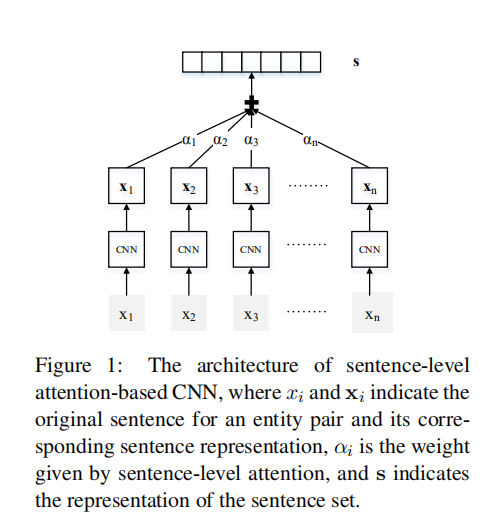
句级结构基于注意力的CNN，在那里xi和xi指示原句为一对实体及其相应的句子表示,αi是重量由句级注意给出，s表示句子集的表示。

本文提出了一种基于句子级注意力机制的卷积神经网络(CNN)，用于远程监督关系的提取。如图1所示，我们使用CNN来嵌入句子的语义。然后，为了利用所有的信息句，我们把这些关系表示为句子的语义组合。为了解决错误的标记问题，我们在多实例上建立了句子级的注意，期望动态地减少这些噪声实例的权重。最后，利用句级注意加权关系向量提取关系。在关系抽取的任务中，我们在真实数据集上对模型进行了评价。实验结果表明，与现有方法相比，该模型在关系提取方面取得了显著的、一致的改进。

本文的贡献可以总结如下:
* 与已有的神经关系推理模型相比，该模型能够充分利用每一对实体的所有信息句。
* 针对远程监控中存在的错误标签问题，提出了选择性注意的方法，以降低对噪声的重视程度。
* 在实验中，我们发现选择性注意对两种CNN模型在提取关系时都是有益的。


# 2相关工作
关系提取是自然语言处理中最重要的任务之一。在关系提取方面，特别是在监督关系提取方面，已经投入了大量的研究。这些方法大都需要大量的带注释的数据，费时费力。为了解决这个问题，(Mintz et al.， 2009)通过远程监控将纯文本与自由基对齐。然而，远视不可避免地伴随着错误的标签问题。为了缓解错误标签问题，(Riedel et al.， 2010)将关系提取的实时监控模型建模为一个多实例单标签问题，(Hoffmann et al.， 2011;Surdeanu等，2012)在关系提取中采用多实例多标签学习。多实例学习最初是为了解决预测药物活性时训练数据标签模糊的问题(Diet- terich et al.， 1997)。多实例学习考虑到每个实例的标签的可靠性。(Bunescu and Mooney, 2007)将弱监督与多实例学习联系起来，并将其扩展到关系提取。但是，所有基于特征的方法都严重依赖于NLP工具生成特征的的质量，这将导致误差传播问题。

近年来，深度学习(Bengio, 2009)被广泛应用于计算机视觉、语音识别等各个领域。它还成功地应用于不同的NLP任务，如词性标注(Collobert et al.， 2011)、情感分析(dos Santos和Gatti, 2014)、解析(Socher et al.， 2013)和机器翻译(Sutskever et al.， 2014)。近年来，由于深度学习的成功，许多研究者研究了利用神经网络自动学习特征进行关系提取的可能性。(Socher et al.， 2012)采用递归神经网络进行关系提取。它们首先解析句子，然后将解析树中的每个节点表示为一个向量。(曾等，2014;dos Santos等，2015)采用端到端卷积神经网络进行关系提取。此外，(Xie et al.， 2016)尝试将关系的文本信息纳入关系提取中。

虽然这些方法取得了很大的成功，但它们仍然在句子层面提取关系，缺乏足够的训练数据。此外，传统方法的多实例学习策略难以应用于神经网络模型中。因此，(Zeng et al.， 2015)将至少一种多实例学习与神经网络模型相结合，提取出远程监控数据之间的关系。但是，它们假定每个实体对只有一个句子是活动的。因此，它会丢失大量包含在这些被忽视的句子中的丰富信息。与他们的方法不同的是，我们提出了多实例句子级注意力机制，可以利用所有的信息句。

近年来，基于注意力的模型吸引了众多研究者的兴趣。基于注意力的模型的选择性允许他们学习不同模式之间的对齐。它已被应用于图像分类(Mnih et al.， 2014)、语音识别(Chorowski et al.， 2014)、图像标题生成(Xu et al.， 2015)和机器翻译(Bah- danau et al.， 2014)等多个领域。就我们所知，这是首次将注意力模型应用于远距离监督关系提取。

# 3方法

给出一组{x1, x2，···，xn}和两个对应的实体，我们的模型度量每一个关系r的概率。在本节中，我们将主要分为两个部分来介绍我们的模型:
* 句子编码器。给定一个句子x和两个目标实体，使用卷积中立网络(CNN)构造句子的分布式表示x。
* 选择性注意力机制关注实例。在学习所有句子的分布向量表示时，我们使用句子级注意力机制来选择真正表达对应关系的句子。

## 3.1句子编码器
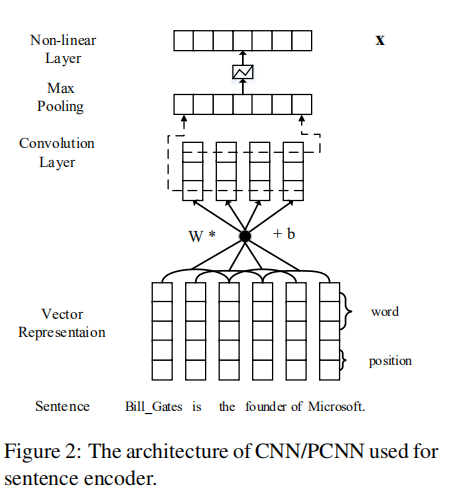
如图2所示，我们用CNN将句子x转换成它的分布式表示形式x。首先，将句子中的单词转化为密集的实值特征向量。其次，利用对流层、最大汇聚层和非线性变换层构造句子的分布式表示，即:x。

### 3.1.1Input表示
CNN的输入是句子x的原始单词，我们首先将单词转换成低维向量。在这里，每个输入单词通过嵌入矩阵被转换成一个词向量。此外，为了指定每个单词对的位置，我们还对句子中的所有单词使用位置嵌入。

词嵌入。词嵌入的目的是将词转换成分布式的表示形式，以捕获词的语法和语义意义。给定一个由m个单词组成的句子x = {w1, w2,..., wm}，每个单词wi都用实值向量表示。单词表示由嵌入矩阵V中的列向量编码，其中V为固定大小的词汇表。

位置嵌入。在关系抽取的任务中，接近目标实体的词通常具有确定实体间关系的信息性。与(Zeng et al.， 2014)类似，我们使用实体对指定的位置嵌入。它可以帮助CNN跟踪每个单词与头部或尾部实体的距离。它被定义为从当前单词到head或tail实体的相对距离的组合。例如，在“比尔·盖茨是微软的创始人”这句话中。，从“创始人”一词到“首席实体”比尔•盖茨(Bill Gates)的相对距离为3，而“尾部实体”微软(Microsoft)为2。

在图2所示的例子中，假设单词嵌入的维数da为3，位置嵌入的维数db为1. 最后，我们将单词embeddings和所有单词的position embeddings连接起来，表示为向量序列w = {w1, w2，···，wm}，其中wi。

### 3.1.2卷积、最大池化和非线性层

在关系提取方面，主要的挑战是句子的长度是可变的，重要的信息可以出现在句子的任何区域。因此，我们应该充分利用所有的特征，进行全局的关系预测。这里，我们使用卷积层来合并所有这些特性。卷积层首先用一个长度为l的滑动窗口提取句子的局部特征。在图2所示的例子中，我们假设滑动窗口l的长度为3。然后，它通过最大池操作组合所有局部特征，为输入语句获得一个固定大小的向量。

这里卷积定义为向量序列w与卷积矩阵 w之间的运算，其中dc为句子的嵌入尺寸。让我们将向量qi Rl×d定义为第i个窗口内一系列w字嵌入向量的串联:
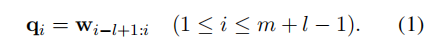

由于窗口在靠近句子边界时可能位于句子边界之外，所以我们为句子设置了特殊的填充标记。这意味着我们将所有超出范围的输入向量 wi(i < 1或i > m)视为零向量。

因此，卷积层的第i个滤波器计算为:

pi = [Wq + b]i	(2)

其中b为偏置向量。向量x∈R的第i个元素为:

[x]i = max(pi),	(3)

此外，PCNN (Zeng et al.， 2015)是CNN的一个变种，在关系提取中采用分段最大池化的方法。每个卷积滤波器pi被头部和尾部实体分成三个部分(pi1、pi2、pi3)。最大池压分三个部分分别执行，定义为:

[x]ij = max(pij),	(4) 

将[x]i设为[x]ij的级联。

最后，我们应用一个非线性函数输出，如双曲正切。

## 3.2选择性注意力机制关注实例
假设有一个集合S包含实体对(头、尾)的n个句子，即实体对（head,tail）， S = {x1 x2 ,...,xn}。

利用所有句子的信息,我们的模型代表了集合S 用实值向量 s 预测关系r。很明显，集合S的表示依赖于所有句子的表示x1, x2, xn。每个句子表示xi包含实体对(头、尾)信息包含关系r。

将集合向量s计算为这些句子向量xi的加权和:

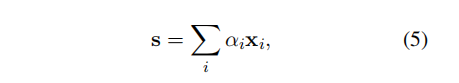

αi是每个句子向量的权重。在本文中,我们定义αi在两种方法:

* 平均值:我们假设集合X中的所有句子对集合的表示有相同的贡献，这意味着嵌入集合S是所有句子向量的平均值:

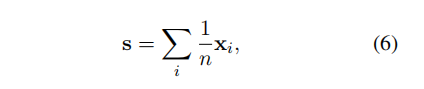

这是我们选择性注意的一个初步基线。

* 选择性注意力机制:然而，错误标签不可避免地会发生。因此，如果我们对每个句子都一视同仁，错误的标注句子会在训练和测试中带来大量的噪音。因此，我们使用主动注意来淡化嘈杂的句子。因此,αi进一步定义为:

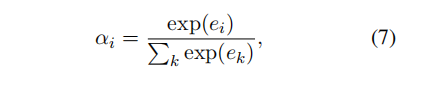
其中ei是一个基于问题的函数，它对输入语句xi和预测关系r的匹配程度进行评分。我们选择了双线性的，在不同的替代方案中表现最佳:
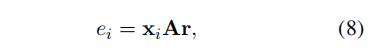

其中A为加权对角矩阵，r为与关系r关联的问题向量，表示关系r的表示形式。
最后，我们定义条件概率p (r | S,θ)通过softmax层如下:

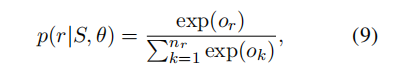
其中nr为关系总数，o为神经网络的最终输出，cor-响应所有关系类型的得分，定义如下:

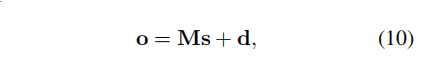

其中d为偏置向量，M为关系的表示矩阵。

(Zeng et al.， 2015)遵循这样的假设，即至少一次提到实体对就会反映出它们之间的关系，并且只使用每组中概率最高的句子进行训练。因此，当把概率最大的句子权重设为1，其他的为0时，他们所采用的多实例学习方法可以看作是我们选择性注意的一个特例。

## 3.3优化与实现细节
在这里，我们介绍了模型的学习和优化细节。我们利用集合水平上的交叉熵定义目标函数如下:
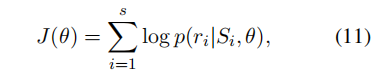
s表示句子的数量集和θ表示模型的所有参数。为了解决优化问题，我们采用随机梯度下降法(SGD)来最小化目标函数。对于学习，我们通过从训练集中随机选择一个小批进行迭代，直到收敛。

在实现中，我们在输出层采用dropout (Srivastava et al.， 2014)来防止过拟合。将dropout层定义为与概率为p的伯努利随机变量a向量h的元素乘，则式(10)改写为:


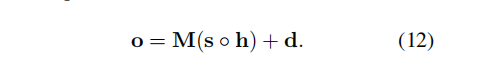
在测试阶段，学习的集合表示被p缩放，即,ˆsi = psi。最后扩展集向量ˆri是用来预测关系。


# 4实验
我们的实验旨在证明，我们的句子级选择性注意力机制神经模型可以缓解错误的标注问题，并充分利用信息句进行远距离监督关系提取。为此，我们首先介绍了实验中使用的数据集和评估指标。接下来，我们使用交叉验证来确定模型的参数。然后，我们评估了选择性注意力机制的效果，并对不同集大小的数据显示了选择性注意力机制的性能。最后，我们比较了我们的方法与几种最先进的基于特征的方法的性能。

## 4.1数据集和评价指标
我们在广泛被使用的数据集上评估我们的模型，该数据集由(Riedel et al.， 2010)开发，也被(Hoffmann et al.， 2011)使用;Surdeanu等，2012)。该数据集是通过Freebase与《纽约时报语料库》(New York Times corpus, NYT)的关系对齐而生成的。实体提及是使用斯坦福命名实体打标 (Finkel et al.， 2005)发现的，并进一步匹配到Freebase实体的名称。Freebase关系分为两部分，一部分用于训练，另一部分用于测试。它对2005-2006年语料库中的句子进行了对齐，并将其作为训练实例。测试实例是2007年的对齐语句。有53种可能的关系，包括一种特殊的关系NA，它表明头部和尾部实体之间没有关系。训练数据包含522,611个句子，281,270个实体对和18,252个相关事实。测试集包含172,448个句子、96,678个实体对和1,950个关系事实。

与之前的工作类似(Mintz等)。，我们在held-out评估中评估我们的模型。它通过比较从测试文章中发现的关系事实与Freebase中的关系事实来评估我们的模型。它假定测试系统在Freebase内部和外部的相关事实方面具有类似的性能。因此，不需要耗费时间的人工评估，held-out评估提供了一个近似的精度度量。在我们的实验中，我们报告了聚合曲线的精度/召回曲线和Precision@N (P@N)。

## 4.2实验设置
### 4.2.1字嵌入的准备
本文利用word2vec工具对纽约时报语料库中的嵌入词进行训练。我们将语料库中出现100次以上的单词作为词汇保存。此外，当一个实体有多个单词时，我们将它的单词连接起来。
### 4.2.2参数设置
以前的工作后,我们优化我们的模型训练集上使用三折交叉验证。我们使用一个网格搜索来确定最优参数,并选择学习速率对SGD在{0.1,0.01,0.001,0.0001}之间,滑动窗口大小l∈{1, 2, 3,···, 8},句子嵌入大小为n∈{50,60,300},和批量大小B在{160、640、1280}之间。对于其他参数，由于它们对结果的影响很小，我们遵循了(Zeng et al.， 2014)中的设置。对于训练，我们在所有地方设置迭代训练数据为25轮。在表1中，我们列出了实验中使用的所有参数。
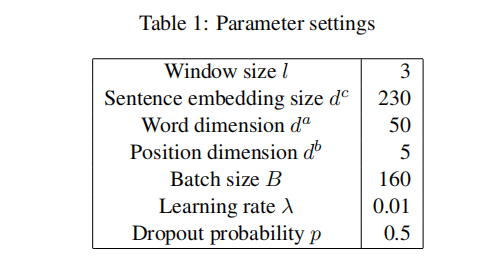
## 4.3句级选择性注意力机制的影响
为了证明句子水平选择性注意的效果，我们通过实证比较不同的方法，通过held-out评价。我们选择(Zeng et al.，2014)中提出的CNN模型和(Zeng et al.， 2015)中提出的PCNN模型作为我们的句子编码器，并自行实现，其结果与作者报道的结果相当。我们将两种不同的CNN的性能与句子级注意(ATT)和至少一种多实例学习(ONE)进行了比较(Zeng et al.， 2015)。

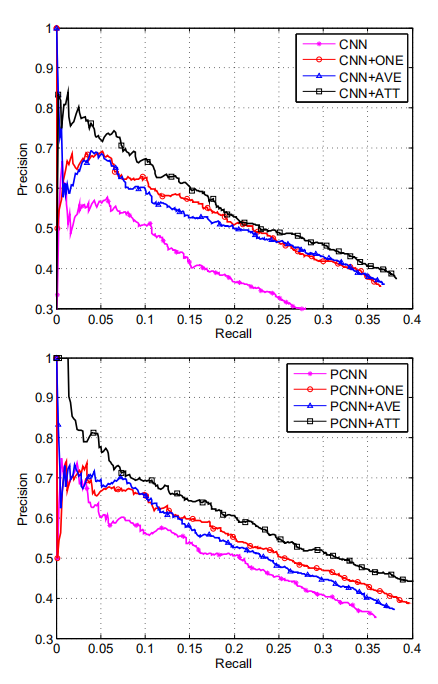
从图3中我们可以观察到:(1)对于CNN和PCNN，ONE方法都比CNN/PCNN有更好的性能。原因是原始远程监控训练数据中含有大量的噪声，噪声数据会影响关系提取的性能。(2)对于CNN和PCNN来说，相对于CNN/PCNN, AVE方法对于关系提取都是有用的。这表明，考虑更多的句子有利于关系提取，因为信息的相互补充可以降低噪声。(3)对于CNN和PCNN, AVE方法的性能与ONE方法相似。这表明，AVE方法虽然带来了更多的句子信息，但由于它对每个句子都一视同仁，同时也带来了错误标注句子的噪声，这可能会影响关系提取的性能。(4)对于CNN和PCNN来说，ATT方法在整个召回范围内的精度都是其他方法(包括AVE方法)中最高的方法。说明所提出的选择性注意是有益的。它能有效地滤除无意义的句子，缓解远距离监督关系提取中的错误标注问题。
## 4.4句数的影响
在原始测试数据集中，有74,857个实体对只对应一个句子，几乎占所有实体对的3/4。由于我们的选择性注意的优势在于包含多个句子的实体对，所以我们比较了CNN/PCNN+ONE、CNN/PCNN+AVE和CNN/PCNN+ATT的性能
具有多个句子的实体对。然后我们在三个测试设置中检查这三个方法:

* 一:对于每个测试实体对，我们随机选择一个句子，用这个句子来预测关系。
* 二:对于每个测试实体对，我们随机选择两句话进行关系提取。
* All:我们使用每个实体对的所有句子对于关系抽取。

注意，我们在训练中使用所有的句子。我们将在helout评估中报告每个模型的P@100、P@200、P@300和它们的平均值。表2显示了三种测试设置中比较模型的P@N。从表中可以看出:(1)对于CNN和PCNN, ATT方法在所有的测试设置中都取得了最好的性能。证明了句子级选择性注意在多实例学习中的有效性。(2)对于CNN和PCNN来说，在一个测试设置中，AVE方法与ATT方法是可以比较的。然而，当每个实体对的测试语句数量增加时，AVE方法的性能几乎没有改善。甚至在P@100和P@200中，随着句子数量的增加，这个词还会逐渐减少。原因是，由于我们对每个句子都一视同仁，所以没有表达任何关系的句子所包含的噪声会对关系提取的性能产生负面影响。(3)在一个测试设置中，CNN+AVE和CNN+ATT比CNN+ONE有5%到8%的改进。自
每个实体对在这个测试设置中只有一句话，这些方法唯一的不同之处在于训练。因此，使用所有的句子会带来更多的信息，虽然它也可能带来一些额外的噪音。(4)对于CNN和PCNN, ATT方法在两种基线和所有测试设置下的性能都优于其他两种基线，分别超过5%和9%。这表明，考虑到更多有用信息，CNN+ATT排名越高的关系事实越可靠，有利于关系提取。
## 4.5与基于特征的方法的比较
为了对所提出的方法进行评价，我们选择了以下三种基于特征的方法进行对比。

Mintz (Mintz et al.， 2009)是一种传统的远程监督模型。

MultiR (Hoffmann et al.， 2011)提出了一种处理重叠关系的多实例学习的概率图形模型。

MIML (Surdeanu et al.， 2012)联合建模了多个实例和多个关系。

我们使用作者发布的源代码来实现它们。
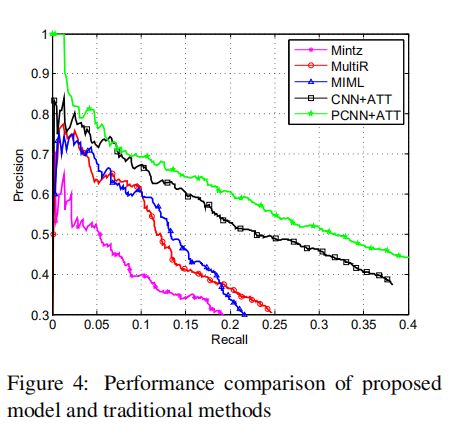
图4为每种方法的查准率/查全率曲线。我们可以观察到:(1)CNN/PCNN+ATT在整个召回范围内显著优于所有基于特征的方法。当召回率大于0.1时，基于特征的方法的性能会迅速下降。相比之下，我们的模型在召回率约为0.3之前具有合理的精度。说明人工设计的特征不能简洁地表达句子的语义，NLP工具带来的不可避免的错误会影响关系提取的性能。而CNN/PCNN+ATT自动学习每个句子的表示，可以很好地表达每个句子。(2) PCNN+ATT在整个召回范围内的表现要比CNN+ATT好得多。它是指选择性注意考虑所有句子的整体信息，除了句子内部的信息。因此，如果我们有一个更好的句子编码器，我们的模型的性能可以进一步提高。

## 4.6案例研究
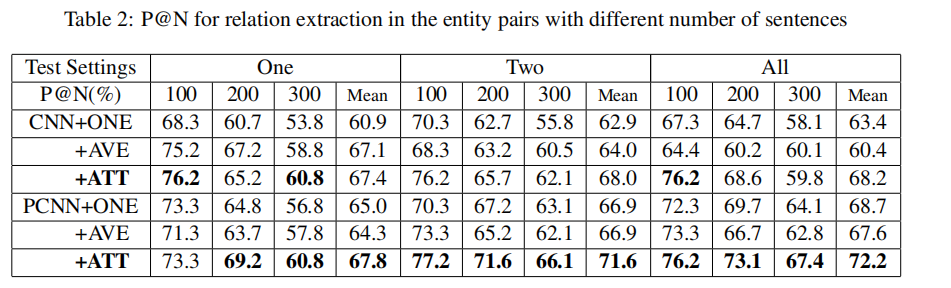
表3显示了从测试数据中选择注意的两个例子。对于每个关系，我们分别给出了注意权重最高和最低的对应句子。我们用粗体格式突出显示实体对。
从表中我们发现:前一个例子与雇主的关系。注意权重低的句子没有表达两个实体之间的关系，而注意权重高的句子表明Mel Karmazin是Sirius卫星电台的首席执行官。后面的例子与出生地点有关。注意分量低的句子表示Ernst Haefliger是在哪里死的，而注意分量高的句子表示Ernst Haefliger是在哪里出生的。


# 5结论与未来工作
在本文中，我们开发了句子水平选择性注意CNN。该模型能充分利用所有的信息句，有效地解决了远距离监督关系提取中的标注错误问题。在实验中，我们评估了我们的关系提取任务模型。实验结果表明，我们的模型显著地、持续地优于目前最先进的基于特征的方法和神经网络方法。
未来，我们将探索以下方向:
•我们的模型通过实例级选择性注意将多实例学习与神经网络相结合。它不仅可以用于远程监督关系提取，还可以用于其他多实例学习任务。我们将在文本分类等其他领域探索我们的模型。
•CNN是提取神经关系的有效神经网络之一。研究人员还提出了许多其他的神经网络模型用于关系提取。在将来，我们将合并实例级选择性注意力机制技术与这些模型的关系提取。